In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-04-14 11:06:45,229 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-14 11:06:45,230 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-04-14 11:06:45,231 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-14 11:06:45,231 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-04-14 11:06:45,231 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

yt : [INFO     ] 2022-04-14 11:07:00,352 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-04-14 11:07:00,355 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-04-14 11:07:00,994 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-04-14 11:07:01,077 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-04-14 11:07:01,078 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-04-14 11:07:01,078 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-04-14 11:07:01,078 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022


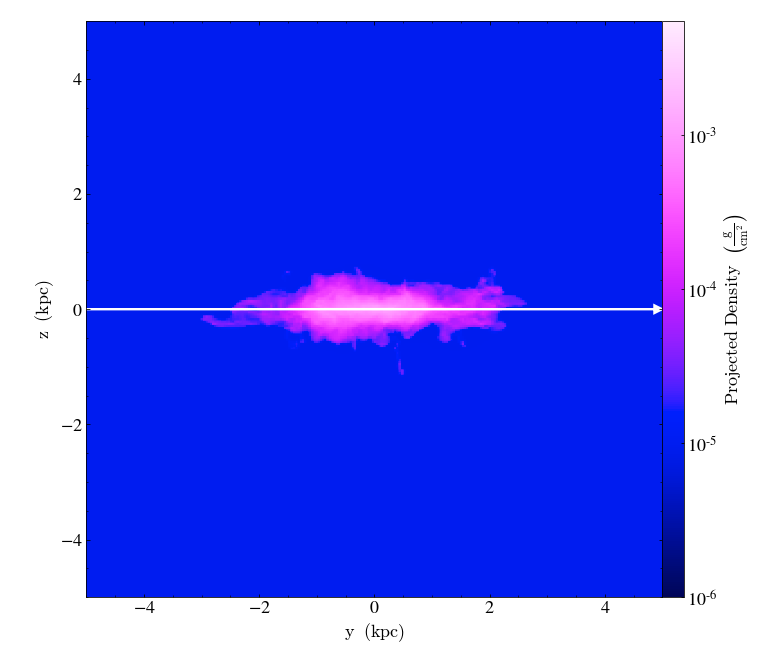

yt : [INFO     ] 2022-04-14 11:07:07,692 Projection completed
yt : [INFO     ] 2022-04-14 11:07:07,692 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-04-14 11:07:07,692 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-04-14 11:07:07,693 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-04-14 11:07:07,693 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-04-14 11:07:07,694 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: inval


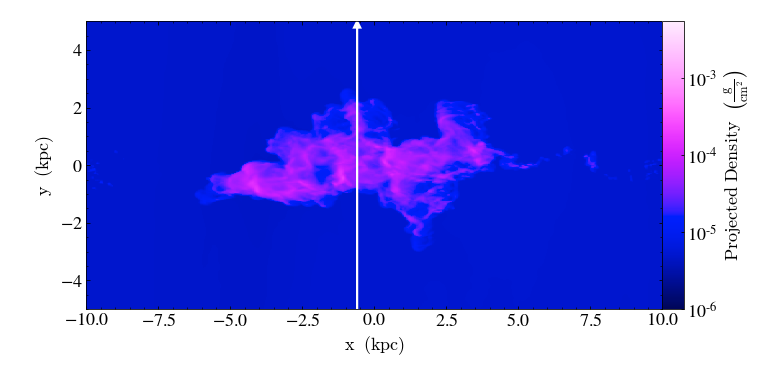

yt : [INFO     ] 2022-04-14 11:07:10,723 Projection completed
yt : [INFO     ] 2022-04-14 11:07:10,724 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-04-14 11:07:10,724 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-04-14 11:07:10,725 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-04-14 11:07:10,725 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-04-14 11:07:10,726 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


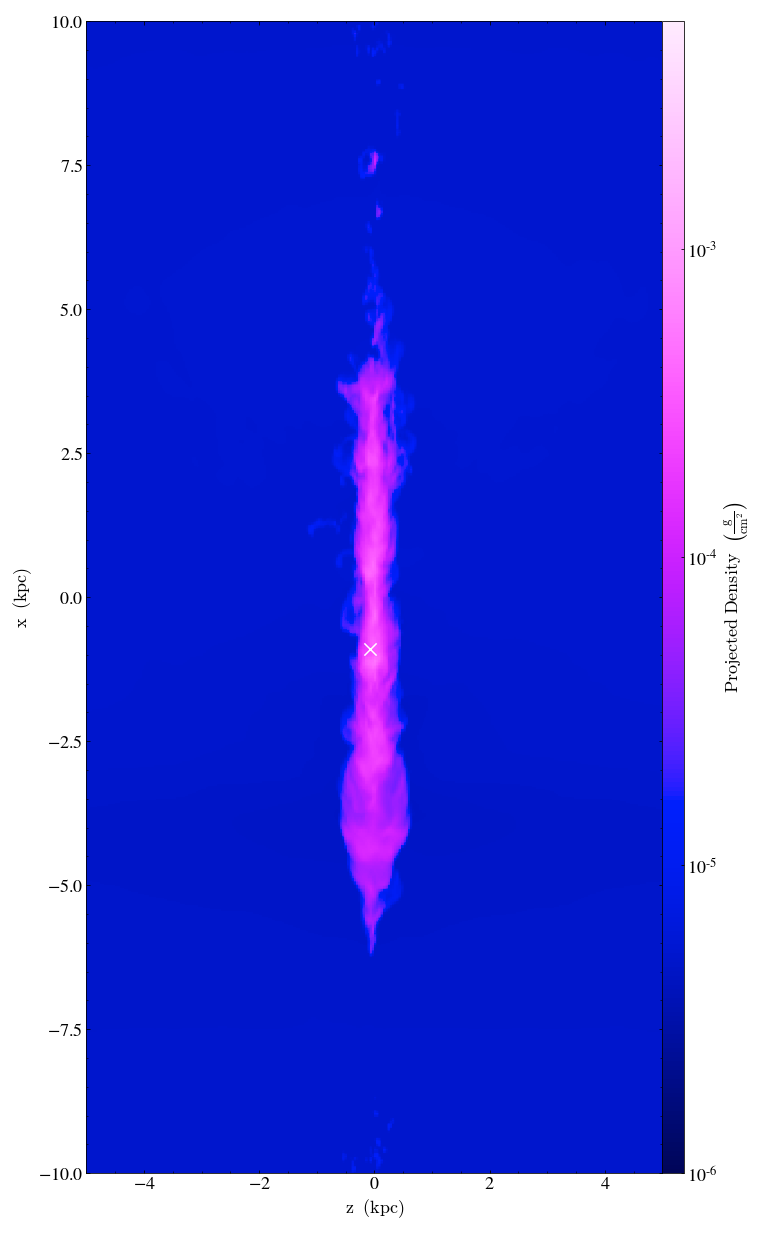

In [4]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5)

px = yt.ProjectionPlot(ds, 'x', 'density')
px.set_cmap(("density"), "cet_bmw")
px.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
px.annotate_ray(ray1, arrow=True)
px.show()

pz = yt.ProjectionPlot(ds, 'z', 'density')
pz.set_cmap(("density"), "cet_bmw")
pz.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
pz.annotate_ray(ray1, arrow=True)
pz.show()

py = yt.ProjectionPlot(ds, 'y', 'density')
py.set_cmap(("density"), "cet_bmw")
py.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
py.annotate_marker((-0.07,-0.9), coord_system="plot", plot_args={"color":"white", "s": 150})
py.show()

# H

In [10]:
trident.add_ion_fields(ray1, ions=['H I', 'H II'], ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)


(array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

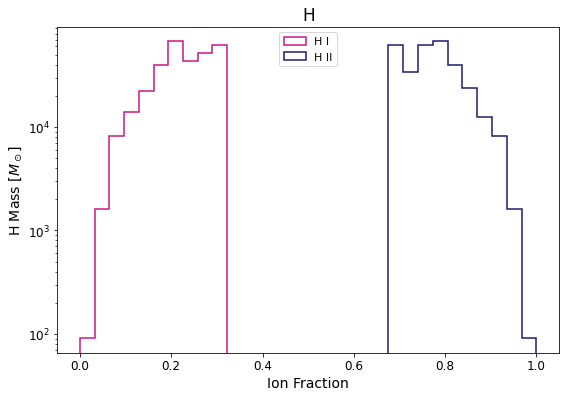

In [29]:
H1 = np.array(ray1.all_data()['H_p0_ion_fraction'])
H2 = np.array(ray1.all_data()['H_p1_ion_fraction'])
H_m = np.array(ray1.all_data()['H_mass'])

plt.figure(figsize=(9,6))
plt.hist(H1, histtype='step', fill=False, weights=H_m/M_sun, 
         log=True, color='mediumvioletred', label='H I', linewidth=1.5, alpha=1)
plt.hist(H2, histtype='step', fill=False, weights=H_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.5, label='H II', alpha=1)
plt.legend(loc='upper center', fontsize=11)
plt.title('H', fontsize=17)
plt.xlabel('Ion Fraction', fontsize=14)
plt.ylabel('H Mass [$M_\odot$]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Si

In [5]:
trident.add_ion_fields(ray1, ions=['Si I', 'Si II', 'Si III', 'Si IV'], ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [INFO     ] 2022-04-12 18:52:41,785 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-04-12 18:52:41,789 Identified 1.210e+02 octs


In [15]:
Si1 = np.array(ray1.all_data()['Si_p0_ion_fraction'])
Si2 = np.array(ray1.all_data()['Si_p1_ion_fraction'])
Si3 = np.array(ray1.all_data()['Si_p2_ion_fraction'])
Si4 = np.array(ray1.all_data()['Si_p3_ion_fraction'])
Si_m = np.array(ray1.all_data()['Si_mass'])

(-0.01, 0.04)

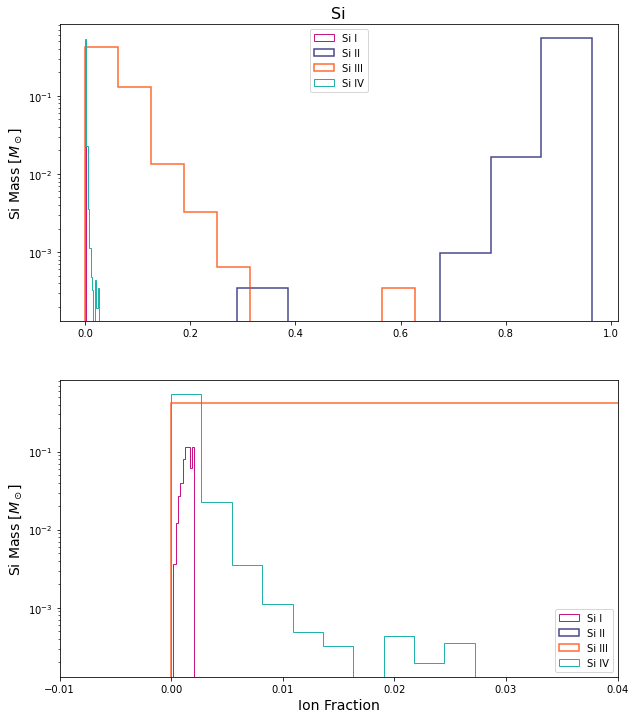

In [9]:
fig = plt.figure(figsize=(10,12))

p1= fig.add_subplot(2,1,1)
plt.hist(Si1, histtype='step', fill=False, weights=Si_m/M_sun, 
         log=True, color='mediumvioletred', label='Si I')
plt.hist(Si2, histtype='step', fill=False, weights=Si_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.5, alpha=0.8, label='Si II')
plt.hist(Si3, histtype='step', fill=False, weights=Si_m/M_sun, 
         log=True, color='orangered', linewidth=1.5, alpha=0.8, label='Si III')
plt.hist(Si4, histtype='step', fill=False, weights=Si_m/M_sun, 
         log=True, color='lightseagreen', label='Si IV')
plt.legend(loc='upper center')
plt.title('Si', fontsize=16)
plt.ylabel('Si Mass [$M_\odot$]', fontsize=14)

p2 = fig.add_subplot(2,1,2)
plt.hist(Si1, histtype='step', fill=False, weights=Si_m/M_sun, 
         log=True, color='mediumvioletred', label='Si I')
plt.hist(Si2, histtype='step', fill=False, weights=Si_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.5, alpha=0.8, label='Si II')
plt.hist(Si3, histtype='step', fill=False, weights=Si_m/M_sun, 
         log=True, color='orangered', linewidth=1.5, alpha=0.8, label='Si III')
plt.hist(Si4, histtype='step', fill=False, weights=Si_m/M_sun, 
         log=True, color='lightseagreen', label='Si IV')
plt.legend(loc='lower right')
plt.xlabel('Ion Fraction', fontsize=14)
plt.ylabel('Si Mass [$M_\odot$]', fontsize=14)
plt.xlim(-0.01,0.04)

# C

In [61]:
trident.add_ion_fields(ray1, ions=['C I', 'C II', 'C III', 'C IV', 'C V', 'C VI', 'C VII'], ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [WARNING  ] 2022-04-14 14:50:21,441 Field ('gas', 'C_p0_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-04-14 14:50:21,443 Field ('gas', 'C_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-04-14 14:50:21,444 Field ('gas', 'C_p0_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-04-14 14:50:21,445 Field ('gas', 'C_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-04-14 14:50:21,445 Field ('gas', 'C_p0_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-04-14 14:50:21,446 Field ('gas', 'C_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-04-14 14:50:21,447 Field ('gas', 'C_p0_mass') already exists. Not clobbering.
yt : [WARNING  ] 2

Text(0.5, 0, 'Ion Fraction')

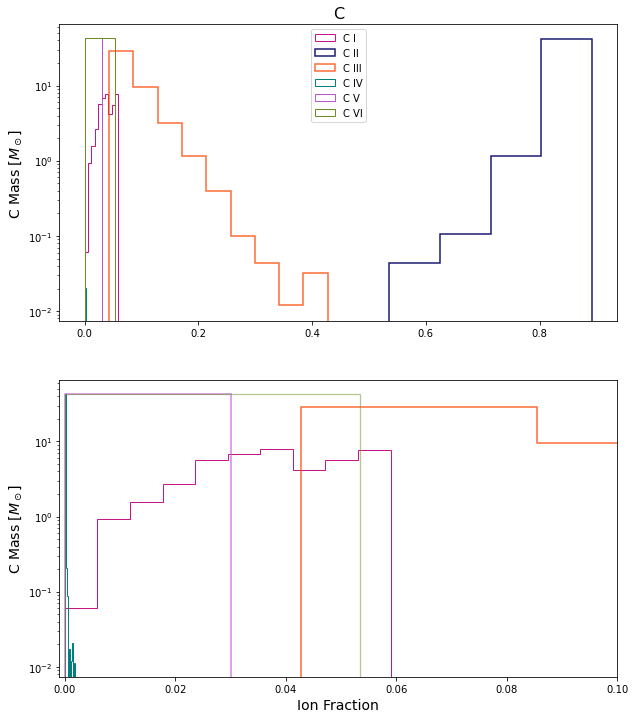

In [26]:
C1 = np.array(ray1.all_data()['C_p0_ion_fraction'])
C2 = np.array(ray1.all_data()['C_p1_ion_fraction'])
C3 = np.array(ray1.all_data()['C_p2_ion_fraction'])
C4 = np.array(ray1.all_data()['C_p3_ion_fraction'])
C5 = np.array(ray1.all_data()['C_p4_ion_fraction'])
C6 = np.array(ray1.all_data()['C_p5_ion_fraction'])
C_m = np.array(ray1.all_data()['C_mass'])

fig = plt.figure(figsize=(10,12))

p1= fig.add_subplot(2,1,1)
plt.hist(C1, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='mediumvioletred', label='C I')
plt.hist(C2, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.5, label='C II')
plt.hist(C3, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='orangered', linewidth=1.5, alpha=0.8, label='C III')
plt.hist(C4, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='teal', label='C IV')
plt.hist(C5, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='mediumorchid', label='C V')
plt.hist(C6, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='olivedrab', label='C VI')
plt.title('C', fontsize=16)
plt.legend(loc='upper center')
plt.ylabel('C Mass [$M_\odot$]', fontsize=14)

p2= fig.add_subplot(2,1,2)
plt.hist(C1, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='mediumvioletred', label='C I')
plt.hist(C2, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.5, alpha=0.8, label='C II')
plt.hist(C3, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='orangered', linewidth=1.5, alpha=0.8, label='C III')
plt.hist(C4, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='teal', label='C IV')
plt.hist(C5, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='mediumorchid', label='C V', linewidth=1.75, alpha=0.6)
plt.hist(C6, histtype='step', fill=False, weights=C_m/M_sun, 
         log=True, color='olivedrab', label='C VI', linewidth=1.25, alpha=0.5)
plt.xlim(-0.001,0.1)
plt.ylabel('C Mass [$M_\odot$]', fontsize=14)
plt.xlabel('Ion Fraction', fontsize=14)



# O

In [27]:
trident.add_ion_fields(ray1, ions=['O I', 'O II', 'O III', 'O IV', 'O V', 'O VI', 'O VII',
                                  'O VIII', 'O IX'], ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)


Text(0.5, 0, 'Ion Fraction')

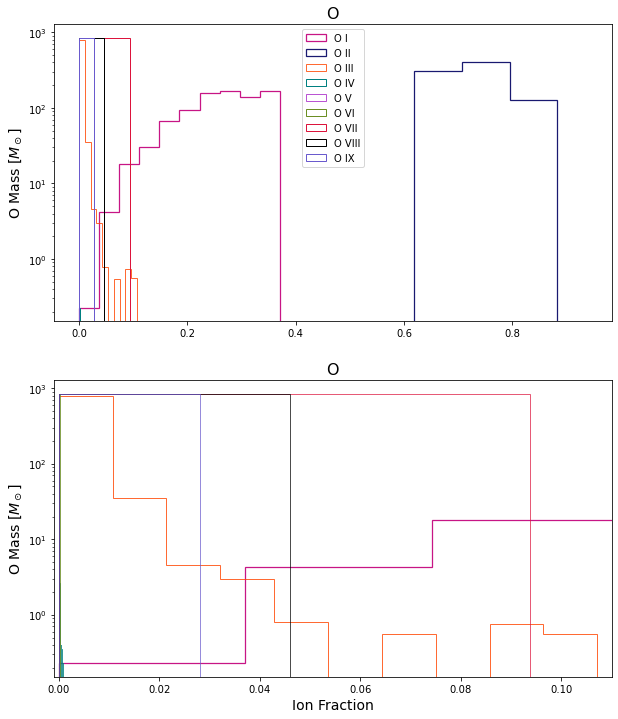

In [37]:
O1 = np.array(ray1.all_data()['O_p0_ion_fraction'])
O2 = np.array(ray1.all_data()['O_p1_ion_fraction'])
O3 = np.array(ray1.all_data()['O_p2_ion_fraction'])
O4 = np.array(ray1.all_data()['O_p3_ion_fraction'])
O5 = np.array(ray1.all_data()['O_p4_ion_fraction'])
O6 = np.array(ray1.all_data()['O_p5_ion_fraction'])
O7 = np.array(ray1.all_data()['O_p6_ion_fraction'])
O8 = np.array(ray1.all_data()['O_p7_ion_fraction'])
O9 = np.array(ray1.all_data()['O_p8_ion_fraction'])
O_m = np.array(ray1.all_data()['O_mass'])

fig = plt.figure(figsize=(10,12))

p1= fig.add_subplot(2,1,1)
plt.hist(O1, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='mediumvioletred', label='O I', linewidth=1.25)
plt.hist(O2, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.25, label='O II')
plt.hist(O3, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='orangered', alpha=0.8, label='O III')
plt.hist(O4, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='teal', label='O IV')
plt.hist(O5, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='mediumorchid', label='O V')
plt.hist(O6, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='olivedrab', label='O VI')
plt.hist(O7, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='crimson', label='O VII')
plt.hist(O8, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='black', label='O VIII')
plt.hist(O9, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='slateblue', label='O IX')
plt.title('O', fontsize=16)
plt.legend(loc='upper center')
plt.ylabel('O Mass [$M_\odot$]', fontsize=14)

p2= fig.add_subplot(2,1,2)
plt.hist(O1, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='mediumvioletred', label='O I', linewidth=1.25)
plt.hist(O2, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.25, label='O II')
plt.hist(O3, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='orangered', alpha=0.8, label='O III')
plt.hist(O4, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='teal', label='O IV', alpha=0.8)
plt.hist(O5, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='mediumorchid', label='O V', alpha=0.8)
plt.hist(O6, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='olivedrab', label='O VI', alpha=0.8)
plt.hist(O7, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='crimson', label='O VII', alpha=0.7)
plt.hist(O8, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='black', label='O VIII', alpha=0.7)
plt.hist(O9, histtype='step', fill=False, weights=O_m/M_sun, 
         log=True, color='slateblue', label='O IX', alpha=0.7)
plt.title('O', fontsize=16)
plt.ylabel('O Mass [$M_\odot$]', fontsize=14)
plt.xlim(-0.001,0.11)
plt.xlabel('Ion Fraction', fontsize=14)

# Al

In [38]:
trident.add_ion_fields(ray1, ions=['Al I', 'Al II', 'Al III', 'Al IV', 'Al V'], ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)


Text(0.5, 0, 'Ion Fraction')

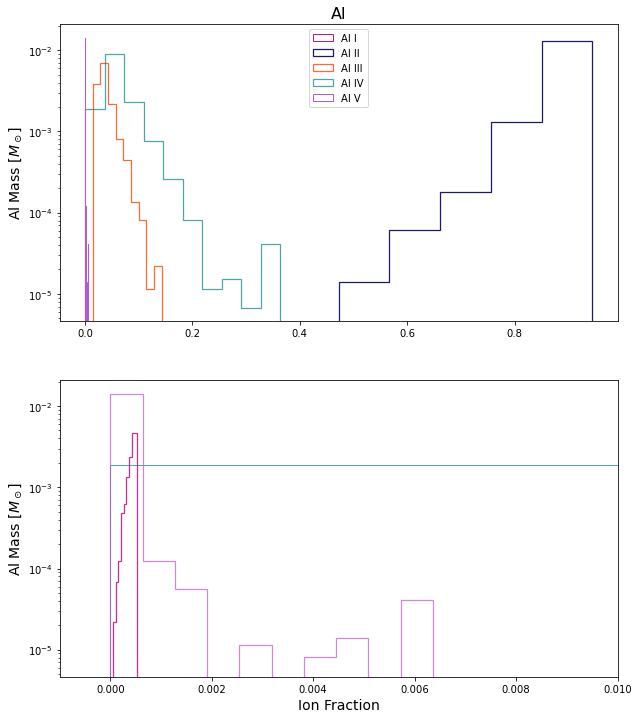

In [44]:
Al1 = np.array(ray1.all_data()['Al_p0_ion_fraction'])
Al2 = np.array(ray1.all_data()['Al_p1_ion_fraction'])
Al3 = np.array(ray1.all_data()['Al_p2_ion_fraction'])
Al4 = np.array(ray1.all_data()['Al_p3_ion_fraction'])
Al5 = np.array(ray1.all_data()['Al_p4_ion_fraction'])
Al_m = np.array(ray1.all_data()['Al_mass'])


fig = plt.figure(figsize=(10,12))

p1= fig.add_subplot(2,1,1)
plt.hist(Al1, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='mediumvioletred', label='Al I')
plt.hist(Al2, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.25, label='Al II')
plt.hist(Al3, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='orangered', linewidth=1.25, alpha=0.8, label='Al III')
plt.hist(Al4, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='teal', label='Al IV', linewidth=1.25, alpha=0.7)
plt.hist(Al5, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='mediumorchid', label='Al V')

plt.title('Al', fontsize=16)
plt.legend(loc='upper center')
plt.ylabel('Al Mass [$M_\odot$]', fontsize=14)

p2= fig.add_subplot(2,1,2)
plt.hist(Al1, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='mediumvioletred', label='Al I', linewidth=1.25, alpha=0.9)
plt.hist(Al2, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.25, label='Al II')
plt.hist(Al3, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='orangered', linewidth=1.25, alpha=0.8, label='Al III')
plt.hist(Al4, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='teal', label='Al IV', alpha=0.7)
plt.hist(Al5, histtype='step', fill=False, weights=Al_m/M_sun, 
         log=True, color='mediumorchid', label='Al V', linewidth=1.25, alpha=0.7)
plt.xlim(-0.001,0.01)
plt.ylabel('Al Mass [$M_\odot$]', fontsize=14)
plt.xlabel('Ion Fraction', fontsize=14)

# Fe

In [45]:
trident.add_ion_fields(ray1, ions=['Fe I', 'Fe II', 'Fe III', 'Fe IV', 'Fe V'], ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)


Text(0.5, 0, 'Ion Fraction')

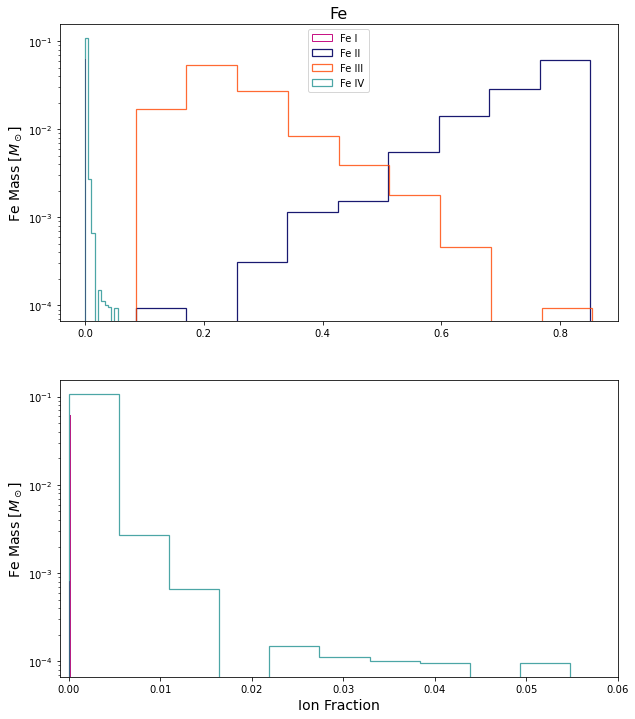

In [60]:
Fe1 = np.array(ray1.all_data()['Fe_p0_ion_fraction'])
Fe2 = np.array(ray1.all_data()['Fe_p1_ion_fraction'])
Fe3 = np.array(ray1.all_data()['Fe_p2_ion_fraction'])
Fe4 = np.array(ray1.all_data()['Fe_p3_ion_fraction'])
Fe5 = np.array(ray1.all_data()['Fe_p4_ion_fraction'])
Fe_m = np.array(ray1.all_data()['Fe_mass'])


fig = plt.figure(figsize=(10,12))

p1= fig.add_subplot(2,1,1)
plt.hist(Fe1, histtype='step', fill=False, weights=Fe_m/M_sun, 
         log=True, color='mediumvioletred', label='Fe I')
plt.hist(Fe2, histtype='step', fill=False, weights=Fe_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.25, label='Fe II')
plt.hist(Fe3, histtype='step', fill=False, weights=Fe_m/M_sun, 
         log=True, color='orangered', linewidth=1.25, alpha=0.8, label='Fe III')
plt.hist(Fe4, histtype='step', fill=False, weights=Fe_m/M_sun, 
         log=True, color='teal', label='Fe IV', linewidth=1.25, alpha=0.7)
# plt.hist(Fe5, histtype='step', fill=False, weights=Fe_m/M_sun, 
#          log=True, color='mediumorchid', label='Fe V')

plt.title('Fe', fontsize=16)
plt.legend(loc='upper center')
plt.ylabel('Fe Mass [$M_\odot$]', fontsize=14)

p2= fig.add_subplot(2,1,2)
plt.hist(Fe1, histtype='step', fill=False, weights=Fe_m/M_sun, 
         log=True, color='mediumvioletred', label='Fe I')
plt.hist(Fe2, histtype='step', fill=False, weights=Fe_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.25, label='Fe II')
plt.hist(Fe3, histtype='step', fill=False, weights=Fe_m/M_sun, 
         log=True, color='orangered', linewidth=1.25, alpha=0.8, label='Fe III')
plt.hist(Fe4, histtype='step', fill=False, weights=Fe_m/M_sun, 
         log=True, color='teal', label='Fe IV', linewidth=1.25, alpha=0.7)
# plt.hist(Fe5, histtype='step', fill=False, weightsFe_m/M_sun, 
#          log=True, color='mediumorchid', label='Fe V')


plt.xlim(-0.001,0.06)
plt.ylabel('Fe Mass [$M_\odot$]', fontsize=14)
plt.xlabel('Ion Fraction', fontsize=14)

In [54]:
trident.add_ion_fields(ray1, ions=['Mg I', 'Mg II', 'Mg III', 'Mg IV'], ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)


Text(0.5, 0, 'Ion Fraction')

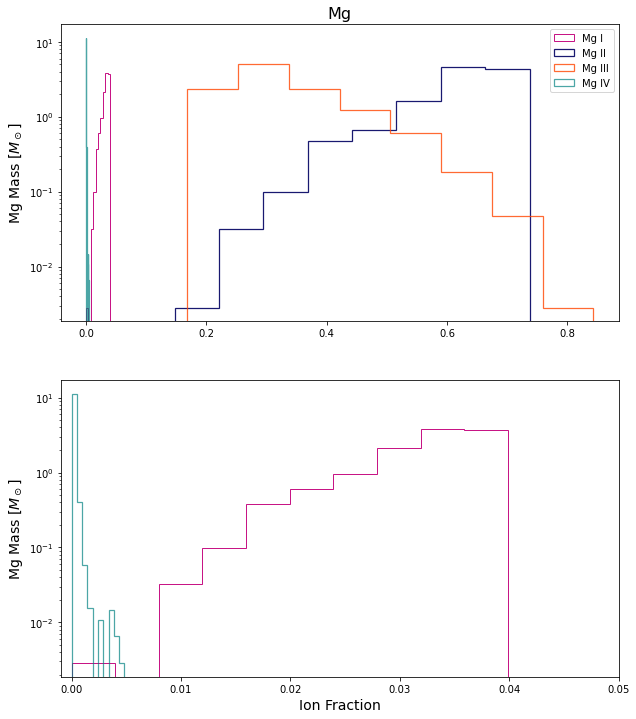

In [59]:
Mg1 = np.array(ray1.all_data()['Mg_p0_ion_fraction'])
Mg2 = np.array(ray1.all_data()['Mg_p1_ion_fraction'])
Mg3 = np.array(ray1.all_data()['Mg_p2_ion_fraction'])
Mg4 = np.array(ray1.all_data()['Mg_p3_ion_fraction'])
Mg_m = np.array(ray1.all_data()['Mg_mass'])


fig = plt.figure(figsize=(10,12))

p1= fig.add_subplot(2,1,1)
plt.hist(Mg1, histtype='step', fill=False, weights=Mg_m/M_sun, 
         log=True, color='mediumvioletred', label='Mg I')
plt.hist(Mg2, histtype='step', fill=False, weights=Mg_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.25, label='Mg II')
plt.hist(Mg3, histtype='step', fill=False, weights=Mg_m/M_sun, 
         log=True, color='orangered', linewidth=1.25, alpha=0.8, label='Mg III')
plt.hist(Mg4, histtype='step', fill=False, weights=Mg_m/M_sun, 
         log=True, color='teal', label='Mg IV', linewidth=1.25, alpha=0.7)
plt.title('Mg', fontsize=16)
plt.legend(loc='upper right')
plt.ylabel('Mg Mass [$M_\odot$]', fontsize=14)

p2= fig.add_subplot(2,1,2)
plt.hist(Mg1, histtype='step', fill=False, weights=Mg_m/M_sun, 
         log=True, color='mediumvioletred', label='Mg I')
plt.hist(Mg2, histtype='step', fill=False, weights=Mg_m/M_sun, 
         log=True, color='midnightblue', linewidth=1.25, label='Mg II')
plt.hist(Mg3, histtype='step', fill=False, weights=Mg_m/M_sun, 
         log=True, color='orangered', linewidth=1.25, alpha=0.8, label='Mg III')
plt.hist(Mg4, histtype='step', fill=False, weights=Mg_m/M_sun, 
         log=True, color='teal', label='Mg IV', linewidth=1.25, alpha=0.7)
plt.xlim(-0.001,0.05)
plt.ylabel('Mg Mass [$M_\odot$]', fontsize=14)
plt.xlabel('Ion Fraction', fontsize=14)

In [11]:
ray1.derived_field_list

[('all', 'H_nuclei_density'),
 ('all', 'density'),
 ('all', 'dl'),
 ('all', 'dx'),
 ('all', 'dy'),
 ('all', 'dz'),
 ('all', 'l'),
 ('all', 'metallicity'),
 ('all', 'redshift'),
 ('all', 'redshift_dopp'),
 ('all', 'redshift_eff'),
 ('all', 'relative_velocity_x'),
 ('all', 'relative_velocity_y'),
 ('all', 'relative_velocity_z'),
 ('all', 'temperature'),
 ('all', 'velocity_los'),
 ('all', 'x'),
 ('all', 'y'),
 ('all', 'z'),
 ('gas', 'H_density'),
 ('gas', 'H_ion_fraction'),
 ('gas', 'H_mass'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'H_number_density'),
 ('gas', 'H_p0_density'),
 ('gas', 'H_p0_ion_fraction'),
 ('gas', 'H_p0_mass'),
 ('gas', 'H_p0_number_density'),
 ('gas', 'H_p1_density'),
 ('gas', 'H_p1_ion_fraction'),
 ('gas', 'H_p1_mass'),
 ('gas', 'H_p1_number_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'Si_density'),
 ('gas', 'Si_ion_fraction'),
 ('gas', 'Si_mass'),
 ('gas', 'Si_number_density'),
 ('gas', 'Si_p0_density'),
 ('gas', 'Si_p0_ion_fraction'),
 ('gas', 'Si_p0_mass'),